# Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt

# Loading the dataset

In [3]:
D_S = pd.read_csv("C:\Excelr assignments\Assigmnent 4 Simple Linear Regression\delivery_time.csv")

In [5]:
D_S

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Visualisation 

In [6]:
# visualisation of the datset
import seaborn as sns

C:\Users\Dawood MD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dawood MD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


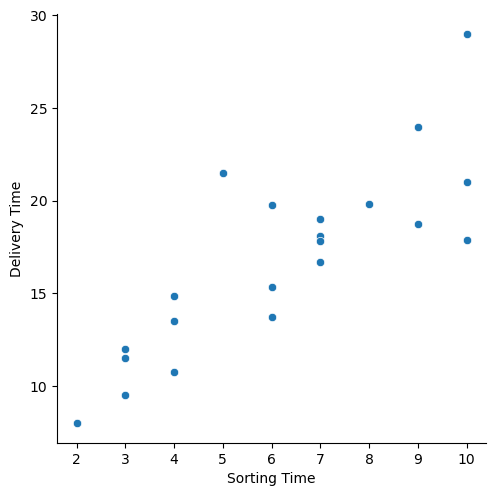

In [16]:
# ploting scatter plot
sns.pairplot(D_S, x_vars=['Sorting Time'], y_vars=['Delivery Time'], kind = 'scatter', size=5)

<Axes: >

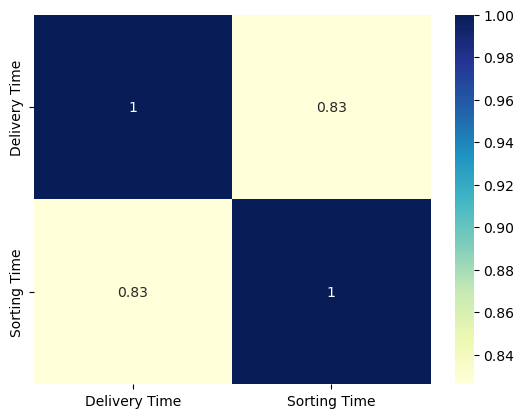

In [25]:
sns.heatmap(D_S.corr(), cmap ='YlGnBu', annot = True )

# Performing Simple Linear Regression

In [26]:
x = D_S['Sorting Time']
y = D_S['Delivery Time']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7 ,random_state=100 )

In [30]:
print( x_train.shape )
print( x_test.shape )
print( y_train.shape )
print( y_test.shape )

(14,)
(7,)
(14,)
(7,)


# importing statmodels library to perform linear regression

In [31]:
import statsmodels.api as sm 

In [34]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [36]:
lr.summary()

C:\Users\Dawood MD\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     25.11
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           0.000304
Time:                        19:15:06   Log-Likelihood:                -33.931
No. Observations:                  14   AIC:                             71.86
Df Residuals:                      12   BIC:                             73.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3196      2.340      2.701      0.019       1.221      11.418
Sorting Time     1.6799      0.335      5.011      0.000       0.949       2.410
==============================================================================
Omnibus:                        0.589   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.166
Skew:                           0.259   Prob(JB):                        0.920
Kurtosis:                       2.872   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# The parameters,i.e. intercept and slope of the regression line obtained
lr.params

const           6.319649
Sorting Time    1.679945
dtype: float64

In [41]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_sm)

In [42]:
y_pred

18     9.679539
20    14.719373
11    13.039428
19    18.079262
13    11.359483
6     18.079262
0     23.119096
dtype: float64

In [44]:
#Imporitng libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#RMSE value
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred ) ))
#R-squared value
print( "R-squared: ",r2_score( y_test, y_pred ) )

RMSE:  2.9144820754365965
R-squared:  0.6670333670281537


# Boxplot for the tested data

<Axes: >

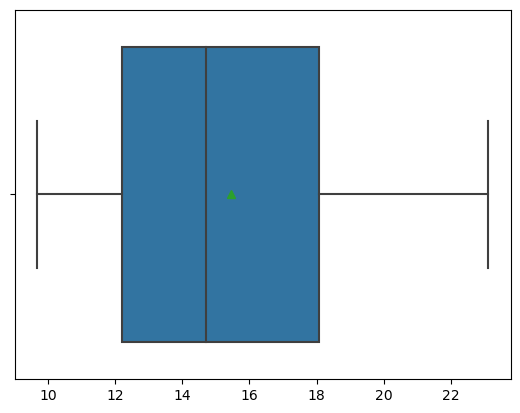

In [55]:
sns.boxplot(x=y_pred, showmeans=True)

# Q-Q plot for the tested data

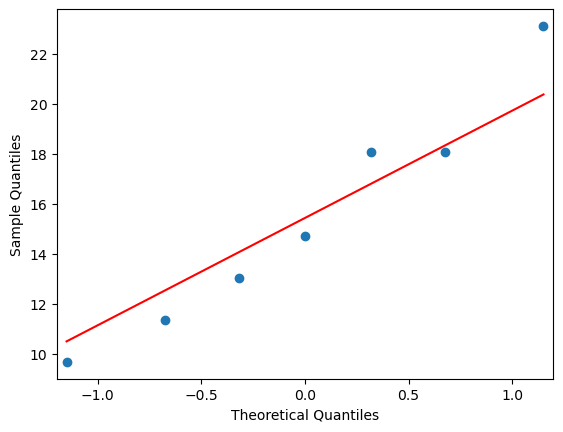

In [54]:
fig = sm.qqplot(y_pred, line='s')

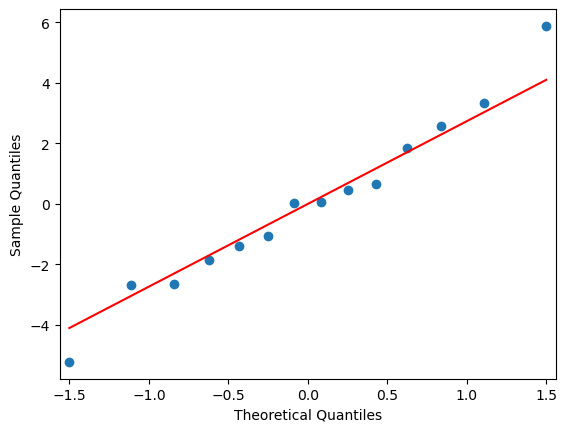

In [58]:
fig = sm.qqplot(lr.resid, line='s')


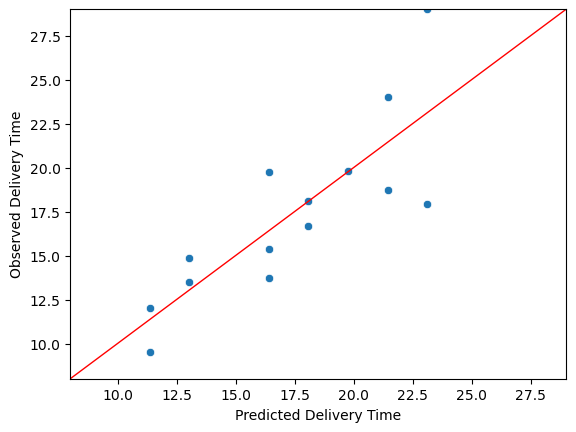

In [65]:
y_max = y.max()
y_min = y.min()

ax = sns.scatterplot(x=lr.fittedvalues, y=y)
ax.set(ylim=(y_min, y_max))
ax.set(xlim=(y_min, y_max))
ax.set_xlabel("Predicted Delivery Time")
ax.set_ylabel("Observed Delivery Time")

x_ref = y_ref = np.linspace(y_min, y_max, 100)
plt.pyplot.plot(x_ref, y_ref, color='red', linewidth=1)
